<a href="https://colab.research.google.com/github/KarizYa/quizPCD/blob/main/QuizPCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

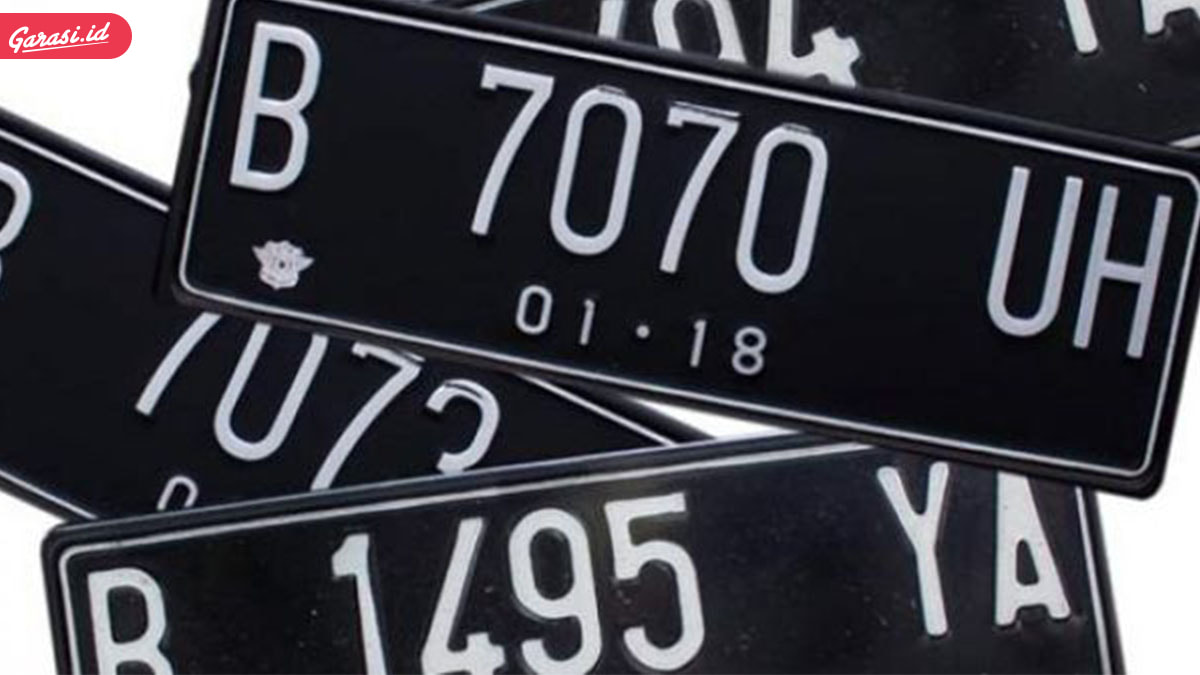

In [9]:
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

image_cv2 = cv2.imread('/content/f6abd377-0bc2-4951-9a3d-216daa114cbd.jpeg')
cv2_imshow(image_cv2)
image_pil = Image.open('/content/f6abd377-0bc2-4951-9a3d-216daa114cbd.jpeg')


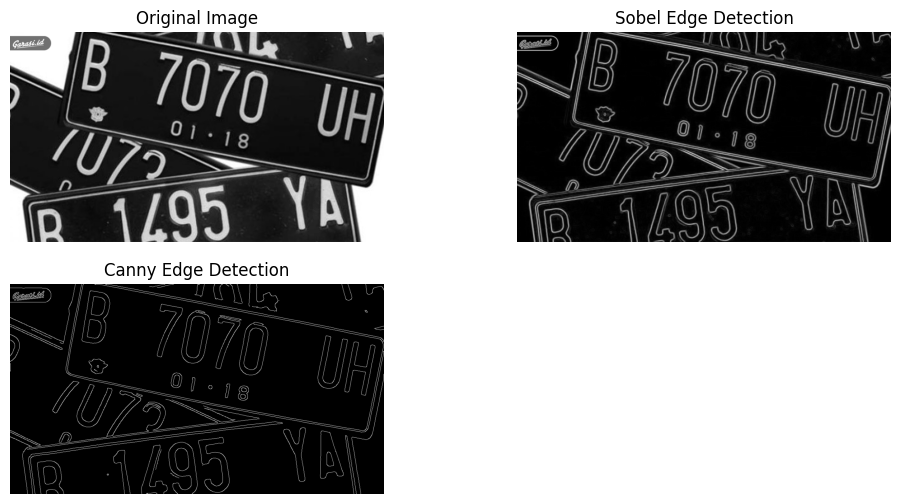

In [22]:
import cv2
from matplotlib import pyplot as plt

# Membaca gambar grayscale
image = cv2.imread('/content/f6abd377-0bc2-4951-9a3d-216daa114cbd.jpeg', cv2.IMREAD_GRAYSCALE)

# Deteksi tepi menggunakan filter Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.sqrt(cv2.addWeighted(cv2.pow(sobel_x, 2.0), 1.0, cv2.pow(sobel_y, 2.0), 1.0, 0.0))

# Deteksi tepi menggunakan algoritma Canny
edges_canny = cv2.Canny(image, 100, 200)

# Menampilkan hasil deteksi tepi
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(edges_canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()


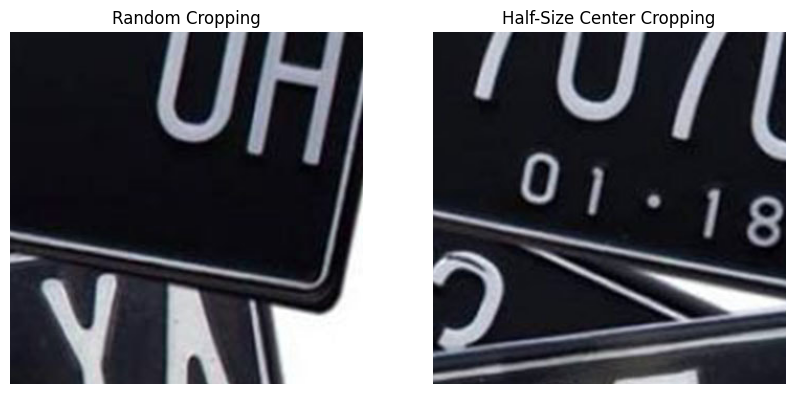

In [12]:
import cv2
import random
from matplotlib import pyplot as plt

# Membaca gambar
image = cv2.imread('/content/f6abd377-0bc2-4951-9a3d-216daa114cbd.jpeg')

# Ukuran gambar asli
height, width = image.shape[:2]

# Ukuran cropping
crop_height = min(height // 2, width // 2)  # Setengah ukuran dari dimensi yang lebih kecil
crop_width = crop_height

# Cropping acak (random cropping)
random_x = random.randint(0, width - crop_width)
random_y = random.randint(0, height - crop_height)
cropped_random = image[random_y:random_y + crop_height, random_x:random_x + crop_width]

# Cropping setengah ukuran dari tengah (half-size center cropping)
center_x = width // 2 - crop_width // 2
center_y = height // 2 - crop_height // 2
cropped_center = image[center_y:center_y + crop_height, center_x:center_x + crop_width]

# Menampilkan hasil cropping menggunakan matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cropped_random, cv2.COLOR_BGR2RGB))
plt.title('Random Cropping')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cropped_center, cv2.COLOR_BGR2RGB))
plt.title('Half-Size Center Cropping')
plt.axis('off')

plt.show()


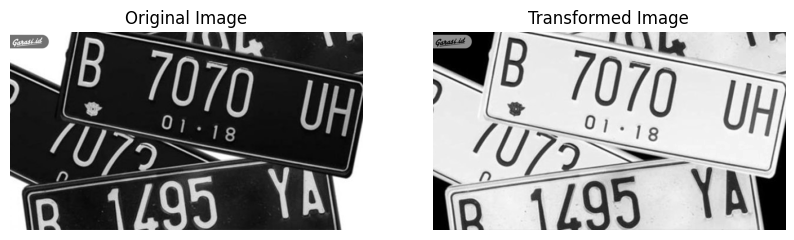

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Membaca gambar dalam skala abu-abu
image = cv2.imread('/content/f6abd377-0bc2-4951-9a3d-216daa114cbd.jpeg', cv2.IMREAD_GRAYSCALE)

# Transformasi warna putih menjadi hitam, dan sebaliknya
transformed_image = cv2.bitwise_not(image)

# Menyimpan hasil transformasi ke file
cv2.imwrite('transformed_image.png', transformed_image)

# Menampilkan gambar hasil transformasi menggunakan matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()


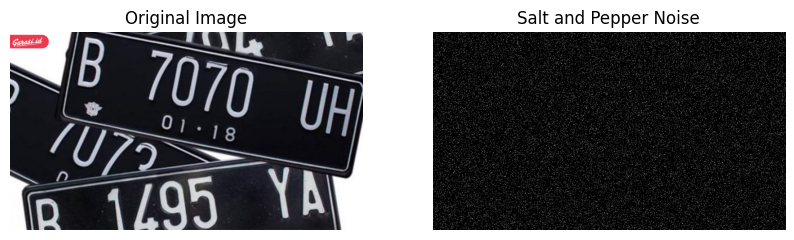

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Membaca gambar
image = cv2.imread('/content/f6abd377-0bc2-4951-9a3d-216daa114cbd.jpeg')

# Menambahkan noise Salt and Pepper
noise_image = np.copy(image)
salt_pepper_noise = np.random.choice([0, 255], size=image.shape[:2], p=[0.95, 0.05])
noise_image[salt_pepper_noise == 255] = 255
noise_image[salt_pepper_noise == 0] = 0

# Menampilkan hasil noise Salt and Pepper menggunakan matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(noise_image, cv2.COLOR_BGR2RGB))
plt.title('Salt and Pepper Noise')
plt.axis('off')

plt.show()



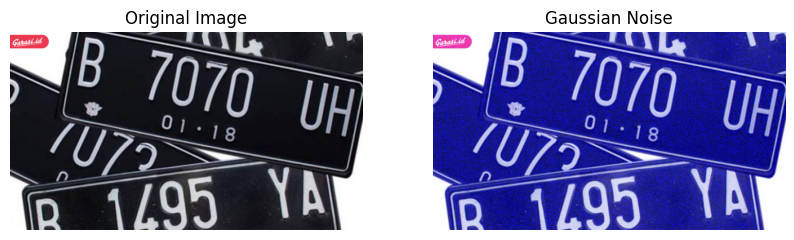

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Membaca gambar
image = cv2.imread('/content/f6abd377-0bc2-4951-9a3d-216daa114cbd.jpeg')

# Menambahkan noise Gaussian
noise_image = np.copy(image)
mean = 0
std_dev = 25
noise = np.zeros_like(image, dtype=np.float64)
cv2.randn(noise, mean, std_dev)
noise_image = cv2.add(image, noise.astype(np.uint8))

# Menampilkan hasil noise Gaussian menggunakan matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(noise_image, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Noise')
plt.axis('off')

plt.show()


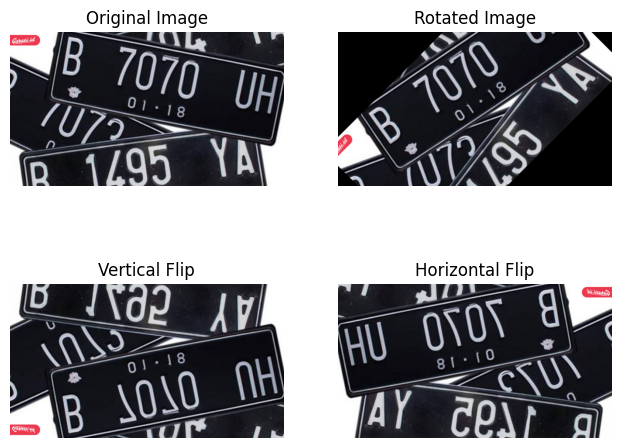

In [19]:
import cv2
from matplotlib import pyplot as plt

# Membaca gambar
image = cv2.imread('/content/f6abd377-0bc2-4951-9a3d-216daa114cbd.jpeg')

# Rotasi gambar
angle = 45
rows, cols = image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

# Flip vertikal dan horizontal
flip_vertical = cv2.flip(image, 0)
flip_horizontal = cv2.flip(image, 1)

# Menampilkan hasil transformasi geometri menggunakan matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(flip_vertical, cv2.COLOR_BGR2RGB))
plt.title('Vertical Flip')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(flip_horizontal, cv2.COLOR_BGR2RGB))
plt.title('Horizontal Flip')
plt.axis('off')

plt.show()
